# **Presentación del proyecto**

**Abstracto con Motivación y Audiencia**

Abstracto:

El proyecto tiene como objetivo analizar un conjunto de datos relacionados con el mercado de vehiculos en EAU, abordando distintos factores que pueden tener relevancia en el precio de los vehiculos como la marca, el modelo, el año, el kilometraje, el estado del vehículo y la ubicación. Se desarrollara un modelo de regresión lineal para predecir el precio de venta de los vehículos en EAU.  

Motivacion:

Predecir el precio de venta de un vehículo es una tarea crucial para compradores, vendedores y comerciantes de vehículos. Los compradores necesitan estimar el valor real de un vehículo para tomar una decisión de compra informada. Los vendedores necesitan establecer un precio competitivo para maximizar sus ganancias. Los comerciantes de vehículos necesitan predecir los precios de compra y venta para gestionar sus inventarios y optimizar sus beneficios.

Audencia:

Este estudio está dirigido a una amplia audiencia, incluyendo:

-Compradores de vehículos: El modelo puede ayudar a los compradores a obtener una estimación precisa del valor de un vehículo antes de realizar una compra.

-Vendedores de vehículos: El modelo puede ayudar a los vendedores a establecer un precio competitivo para sus vehículos y maximizar sus ganancias.

-Comerciantes de vehículos: El modelo puede ayudar a los comerciantes de vehículos a predecir los precios de compra y venta, gestionar sus inventarios y optimizar sus beneficios.

-Analistas de mercado: El modelo puede ser utilizado por analistas de mercado para estudiar las tendencias del mercado, identificar factores que influyen en los precios de los vehículos y realizar pronósticos futuros.


**Contexto Comercial y Analítico**

Contexto comercial:

El mercado automotriz de EAU tiene una gran importancia en el sector automotriz en general, por esta razon es muy importante hacer una eficiente prediccion de los precios futuros ya que estos marcan un parametro para los otros paises.

Problema comercial:

El problema central es poder mejorar la eficiencia de la prediccion de los precios futuros de los autos para que esto ayude tanto a los compradores como venderes a sacar la mayor ganancia posible.

Contexto Analítico: El enfoque analítico se basará en técnicas de análisis exploratorio de datos (EDA) para revelar patrones, correlaciones y tendencias en el conjunto de datos. Se utilizarán visualizaciones y resúmenes numéricos para facilitar la interpretación de los resultados.

Exploración de Datos (EDA): El DataFrame proporcionado tiene 9953 entradas y 27 columnas. Las variables incluyen información sobre el precio, marca, modelo, año, kilometraje, estado del vehículo, tipo de cuerpo, tipo de combustible, capacidad del motor, caballos de fuerza, color exterior, color interior, número de puertas, número de asientos, garantía.

**Preguntas/Hipótesis a Resolver mediante el Análisis de Datos**

¿Qué factores influyen más en el precio de venta de un vehículo en los EAU? (Marca, modelo, año, kilometraje, estado, ubicación, etc.)

¿Existen patrones de precios específicos para diferentes marcas, modelos o años de vehículos?

¿Hay una gran diferencia entre la prediccion de vehiculos nuevos con vehiculos usados?

**Objetivo**

Desarrollar un modelo de aprendizaje automático preciso y confiable para predecir el precio de venta de vehículos nuevos y usados en los Emiratos Árabes Unidos (EAU), utilizando un conjunto de datos y técnicas de análisis exploratorio de datos (EDA) y regresión lineal.

# **Lectura de datos**

**Librerias necesarias para el analisis de datos**

In [1]:
# Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

**Configuración del entorno de Python en Google Colab**

In [2]:
# Montar Google drive
from google.colab import drive
import os
drive.mount("/content/drive")
print(os.getcwd())
os.chdir("/content/drive/My Drive/DesafiosD552295")
print(os.getcwd())

Mounted at /content/drive
/content
/content/drive/My Drive/DesafiosD552295


**Lectura del dataset**

In [3]:
# Cargar el dataset
df = pd.read_csv('/content/drive/MyDrive/DesafiosD552295/Dataset/mercado_autos.csv', encoding='utf-8')

**Análisis inicial del dataset**

In [4]:
df.head()

,price,brand,model,trim,kilometers,year,vehicle_age_years,regional_specs,doors,body_type,...,interior_color,warranty,address,country,city,area_name,location_name,latitude,longitude,seller_type
0,129900,Dodge,Ram,1500 SLT Crew,47566,2021,3,GCC Specs,4,Pick Up Truck,...,Unknown,Yes,"Al Khabaisi, Deira, Dubai, UAE",UAE,Dubai,Deira,Al Khabaisi,25.266173,55.337772,Dealership/Certified Pre-Owned
1,319900,Alfa Romeo,Stelvio,Quadrifoglio,8914,2020,4,GCC Specs,5,SUV,...,Black,Yes,"Abu Hail, Deira, Dubai, UAE",UAE,Dubai,Deira,Abu Hail,25.275416,55.346450,Dealership/Certified Pre-Owned
2,149900,Audi,Q5,S-line,72205,2019,5,GCC Specs,5,SUV,...,Brown,Yes,"Al Khabaisi, Deira, Dubai, UAE",UAE,Dubai,Deira,Al Khabaisi,25.266173,55.337772,Dealership/Certified Pre-Owned
3,79900,Alfa Romeo,GIULIETTA,Veloce,49193,2021,3,GCC Specs,4,Hatchback,...,Black,Yes,"Al Khabaisi, Deira, Dubai, UAE",UAE,Dubai,Deira,Al Khabaisi,25.266173,55.337772,Dealership/Certified Pre-Owned
4,154900,GAC,GS8,GL,30,2024,0,GCC Specs,5,SUV,...,Other Color,Yes,"Al Khabaisi, Deira, Dubai, UAE",UAE,Dubai,Deira,Al Khabaisi,25.266173,55.337772,Dealership/Certified Pre-Owned


In [5]:
df.shape

(9953, 27)

In [6]:
df.sample(7)

,price,brand,model,trim,kilometers,year,vehicle_age_years,regional_specs,doors,body_type,...,interior_color,warranty,address,country,city,area_name,location_name,latitude,longitude,seller_type
9351,145000,Toyota,Fortuner,Other,0,2023,1,Other,4,SUV,...,Black,Does not apply,"Ras Al Khor Industrial 3, Ras Al Khor Industri...",UAE,Dubai,Ras Al Khor,Ras Al Khor Industrial,25.179014,55.379422,Dealer
5558,1600,Bentley,Continental GT,Other,60,2022,2,GCC Specs,2,Soft Top Convertible,...,Black,Yes,"Al Quoz 1, Al Quoz, Dubai, UAE",UAE,Dubai,Al Quoz,Al Quoz 1,25.168752,55.256297,Dealer
6262,81000,Mitsubishi,EclipseCross,Other,0,2024,0,Other,4,SUV,...,Unknown,No,"Ras Al Khor Industrial 2, Ras Al Khor Industri...",UAE,Dubai,Ras Al Khor,Ras Al Khor Industrial,25.179014,55.379422,Dealer
6567,93000,Mercedes-Benz,S-Class,S 500l,90500,2014,10,Korean Specs,4,Sedan,...,Black,Does not apply,"Ras Al Khor Industrial 3, Ras Al Khor Industri...",UAE,Dubai,Ras Al Khor,Ras Al Khor Industrial,25.179014,55.379422,Dealer
3218,79500,Mercedes-Benz,GL-Class,GL 500 4matic,127000,2014,10,GCC Specs,4,SUV,...,Brown,No,"Dubai Marina, Dubai, UAE",UAE,Dubai,Dubai Marina,NaN,25.078641,55.135252,Owner
7221,82000,Toyota,C-HR,Other,50121,2021,3,GCC Specs,5,SUV,...,Black,No,"Al Garhoud, Dubai, UAE",UAE,Dubai,Al Garhoud,NaN,25.240737,55.352039,Dealer
3653,77000,Ford,Mustang,Ecoboost,98000,2020,4,American Specs,2,Hard Top Convertible,...,Black,Does not apply,"Arjan, Dubai, UAE",UAE,Dubai,Arjan,NaN,25.062755,55.239298,Owner


In [7]:
df.tail()

,price,brand,model,trim,kilometers,year,vehicle_age_years,regional_specs,doors,body_type,...,interior_color,warranty,address,country,city,area_name,location_name,latitude,longitude,seller_type
9948,215000,Lexus,LX570,Platinum,191000,2016,8,GCC Specs,4,SUV,...,Beige,Does not apply,"Souq Al Haraj / Tasjeel Village, Saif Zone (Sh...",UAE,Sharjah,Saif Zone (Sharjah International Airport Free ...,Souq Al Haraj / Tasjeel Village,25.343567,55.473511,Dealer
9949,78000,Porsche,Cayenne,GTS,165000,2014,10,GCC Specs,4,SUV,...,Unknown,Does not apply,"Souq Al Haraj / Tasjeel Village, Saif Zone (Sh...",UAE,Sharjah,Saif Zone (Sharjah International Airport Free ...,Souq Al Haraj / Tasjeel Village,25.343567,55.473511,Dealer
9950,173000,Toyota,Land Cruiser,GXR,134000,2018,6,GCC Specs,4,SUV,...,Beige,Yes,"Souq Al Haraj / Tasjeel Village, Saif Zone (Sh...",UAE,Sharjah,Saif Zone (Sharjah International Airport Free ...,Souq Al Haraj / Tasjeel Village,25.343567,55.473511,Dealer
9951,63000,Toyota,Prado,Tx-l MID,290000,2011,13,GCC Specs,5,SUV,...,Beige,Does not apply,"Souq Al Haraj / Tasjeel Village, Saif Zone (Sh...",UAE,Sharjah,Saif Zone (Sharjah International Airport Free ...,Souq Al Haraj / Tasjeel Village,25.343567,55.473511,Dealer
9952,90000,Nissan,Patrol,SE,166000,2017,7,GCC Specs,4,SUV,...,Unknown,Yes,"Souq Al Haraj / Tasjeel Village, Saif Zone (Sh...",UAE,Sharjah,Saif Zone (Sharjah International Airport Free ...,Souq Al Haraj / Tasjeel Village,25.343567,55.473511,Dealer


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9953 entries, 0 to 9952
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               9953 non-null   int64  
 1   brand               9953 non-null   object 
 2   model               9953 non-null   object 
 3   trim                9941 non-null   object 
 4   kilometers          9953 non-null   int64  
 5   year                9953 non-null   int64  
 6   vehicle_age_years   9953 non-null   int64  
 7   regional_specs      9953 non-null   object 
 8   doors               9953 non-null   int64  
 9   body_type           9953 non-null   object 
 10  fuel_type           9953 non-null   object 
 11  seating_capacity    9953 non-null   int64  
 12  transmission_type   9953 non-null   object 
 13  engine_capacity_cc  7992 non-null   object 
 14  horsepower          9495 non-null   object 
 15  no_of_cylinders     9953 non-null   int64  
 16  exteri

In [9]:
df.columns

Index(['price', 'brand', 'model', 'trim', 'kilometers', 'year',
       'vehicle_age_years', 'regional_specs', 'doors', 'body_type',
       'fuel_type', 'seating_capacity', 'transmission_type',
       'engine_capacity_cc', 'horsepower', 'no_of_cylinders', 'exterior_color',
       'interior_color', 'warranty', 'address', 'country', 'city', 'area_name',
       'location_name', 'latitude', 'longitude', 'seller_type'],
      dtype='object')

In [10]:
df.dtypes.value_counts()

object     18
int64       7
float64     2
Name: count, dtype: int64

In [11]:
df.describe()

,price,kilometers,year,vehicle_age_years,doors,seating_capacity,no_of_cylinders,latitude,longitude
count,9953.000000,9.953000e+03,9953.000000,9953.000000,9953.000000,9953.000000,9953.000000,9580.000000,9580.000000
mean,162009.236311,8.187313e+04,2018.118155,5.881845,3.964533,4.597408,5.751432,25.117984,55.232448
std,187120.064955,9.029117e+04,5.163806,5.163806,0.948349,1.795174,2.195505,0.220519,0.262072
min,1000.000000,0.000000e+00,1956.000000,0.000000,2.000000,0.000000,0.000000,23.651535,53.701969
25%,44900.000000,1.894100e+04,2016.000000,2.000000,4.000000,4.000000,4.000000,25.078641,55.207465
50%,92000.000000,6.800000e+04,2019.000000,5.000000,4.000000,5.000000,6.000000,25.168752,55.263450
75%,205000.000000,1.225000e+05,2022.000000,8.000000,5.000000,5.000000,8.000000,25.217623,55.379422
max,999900.000000,2.580000e+06,2024.000000,68.000000,5.000000,8.000000,12.000000,25.868224,56.347195


In [12]:
df.describe(include=['object']).T

,count,unique,top,freq
brand,9953,89,Mercedes-Benz,1531
model,9953,634,Range Rover,254
trim,9941,813,Other,1949
regional_specs,9953,8,GCC Specs,7149
body_type,9953,13,SUV,4534
fuel_type,9953,4,Petrol,9515
transmission_type,9953,2,Automatic Transmission,9697
engine_capacity_cc,7992,10,4000+ cc,1685
horsepower,9495,11,200 - 299 HP,2470
exterior_color,9953,17,White,3151


**Descripción de variables**

Precio: El precio de venta de cada vehículo.

Marca: Fabricante del vehículo.

Modelo: Modelo específico del vehículo.

Recorte: Recortar el nivel del vehículo, indicando diferentes características o paquetes.

Kilómetros: Kilometraje del vehículo, indicando cuánto se ha utilizado.

Año: Año de fabricación.

Años de Edad del Vehículo: La edad del vehículo calculada a partir del año en curso.

Especificaciones Regionales: Especificaciones adaptadas al CCG u otras regiones.

Puertas: Número de puertas en el vehículo.

Tipo de Cuerpo: Tipo de carrocería del vehículo (por ejemplo, SUV, hatchback).

Tipo de Combustible: Tipo de combustible que utiliza el vehículo (por ejemplo, gasolina, diesel).

Capacidad de Asientos: Número de asientos en el vehículo.

Tipo de Transmisión: Transmisión manual o automática.

Capacidad del motor CC: Tamaño del motor en centímetros cúbicos.

Caballos: Potencia de salida del motor del vehículo.

No de Cilindros: Número de cilindros del motor.

Color Exterior: Color del exterior del vehículo.

Color Interior: Color del interior del vehículo.

Garantía: Indica si el vehículo viene con una garantía.

Dirección/País/Ciudad/Nombre de Área/Nombre de Ubicación: Información detallada de la ubicación donde se vende el vehículo.

Latitud/Longitud: Coordenadas geográficas del vehículo listado.

Tipo de Vendedor: Indica si el vendedor es un concesionario o un particular.

# **Data Wrangling: Limpieza y transformación de datos**

**Valores duplicados**

In [13]:
duplicados_exactos = df.duplicated().sum()

# Analizar duplicados en detalle
duplicados = df[df.duplicated()]
print(duplicados)  # Examinar las filas duplicadas

       price          brand       model         trim  kilometers  year  \
412   109000         Jetour     Dashing  1.6T Luxury          10  2024   
713   489000  Mercedes-Benz   GLS-Class      GLS 450           0  2024   
1275   64900        Porsche     Cayenne            S      124177  2011   
1325  135000  Mercedes-Benz     A-Class     AMG A 35      170000  2020   
1326  599000  Mercedes-Benz     G-Class     G 63 AMG       82000  2020   
...      ...            ...         ...          ...         ...   ...   
9892  335000            BMW          iX        Other         500  2023   
9893  170000           MINI  Countryman     Cooper S         500  2024   
9894  450000            BMW          X7  40i M Sport         500  2024   
9895  285000            BMW          X4   xDrive 30i         500  2024   
9896  330000            BMW    4-Series         440i         500  2024   

      vehicle_age_years  regional_specs  doors             body_type  ...  \
412                   0       GCC 

In [14]:
# Comparar filas con la anterior usando eq y shift
filas_iguales_anterior = df.eq(df.shift(1)).all(axis=1)

# Comparar filas con df.iloc[0] usando eq
filas_iguales_primera = df.eq(df.iloc[0]).all(axis=1)

# Identificar filas completamente iguales
filas_completamente_iguales = filas_iguales_anterior & filas_iguales_primera

# Mostrar filas completamente iguales
df[filas_completamente_iguales]

,price,brand,model,trim,kilometers,year,vehicle_age_years,regional_specs,doors,body_type,...,interior_color,warranty,address,country,city,area_name,location_name,latitude,longitude,seller_type


Hay valores duplicados ya que algunos autos pueden compartir mismas caracteristicas, pero no hay filas completamente iguales que vayan a afectar la predccion de nuestro modelos, todas las filas son relevnates. Por eso no se van a borrar.

**Valores nulos**

In [15]:
df.isnull().sum()

price                    0
brand                    0
model                    0
trim                    12
kilometers               0
year                     0
vehicle_age_years        0
regional_specs           0
doors                    0
body_type                0
fuel_type                0
seating_capacity         0
transmission_type        0
engine_capacity_cc    1961
horsepower             458
no_of_cylinders          0
exterior_color           0
interior_color           0
warranty                 0
address                  0
country                  0
city                     0
area_name              619
location_name         5320
latitude               373
longitude              373
seller_type              0
dtype: int64

Se eliminna las colummnas que tiene vaolres nulos y no son relevantes ya que la informacion esta en la columna address

In [16]:
#vamos a eliminar las columnas location_name, longuitude, latitude, area_name.

columnas_a_eliminar = ['area_name', 'location_name', 'latitude', 'longitude']
df_reduced = df.drop(columnas_a_eliminar, axis=1, inplace=False)

#confirmamos que se hayan borrado correctamente

df_reduced.head()

,price,brand,model,trim,kilometers,year,vehicle_age_years,regional_specs,doors,body_type,...,engine_capacity_cc,horsepower,no_of_cylinders,exterior_color,interior_color,warranty,address,country,city,seller_type
0,129900,Dodge,Ram,1500 SLT Crew,47566,2021,3,GCC Specs,4,Pick Up Truck,...,4000+ cc,300 - 399 HP,8,White,Unknown,Yes,"Al Khabaisi, Deira, Dubai, UAE",UAE,Dubai,Dealership/Certified Pre-Owned
1,319900,Alfa Romeo,Stelvio,Quadrifoglio,8914,2020,4,GCC Specs,5,SUV,...,2500 - 2999 cc,500 - 599 HP,6,Red,Black,Yes,"Abu Hail, Deira, Dubai, UAE",UAE,Dubai,Dealership/Certified Pre-Owned
2,149900,Audi,Q5,S-line,72205,2019,5,GCC Specs,5,SUV,...,2000 - 2499 cc,200 - 299 HP,4,Green,Brown,Yes,"Al Khabaisi, Deira, Dubai, UAE",UAE,Dubai,Dealership/Certified Pre-Owned
3,79900,Alfa Romeo,GIULIETTA,Veloce,49193,2021,3,GCC Specs,4,Hatchback,...,1500 - 1999 cc,200 - 299 HP,4,Grey,Black,Yes,"Al Khabaisi, Deira, Dubai, UAE",UAE,Dubai,Dealership/Certified Pre-Owned
4,154900,GAC,GS8,GL,30,2024,0,GCC Specs,5,SUV,...,2000 - 2499 cc,200 - 299 HP,4,Silver,Other Color,Yes,"Al Khabaisi, Deira, Dubai, UAE",UAE,Dubai,Dealership/Certified Pre-Owned


In [17]:
#ponemos other donde hay valores nulos en la columna trim

df_reduced['trim'].fillna('Other', inplace=True)

#vemos que no haya valores nulos en la columna trim

df_reduced.isnull().sum()

price                    0
brand                    0
model                    0
trim                     0
kilometers               0
year                     0
vehicle_age_years        0
regional_specs           0
doors                    0
body_type                0
fuel_type                0
seating_capacity         0
transmission_type        0
engine_capacity_cc    1961
horsepower             458
no_of_cylinders          0
exterior_color           0
interior_color           0
warranty                 0
address                  0
country                  0
city                     0
seller_type              0
dtype: int64

In [18]:
#eliminamos los registros con valores nulos

df_reduced.dropna(inplace=True)

#confirmamos que se hayan eliminado correctamente

df_reduced.isnull().sum()

price                 0
brand                 0
model                 0
trim                  0
kilometers            0
year                  0
vehicle_age_years     0
regional_specs        0
doors                 0
body_type             0
fuel_type             0
seating_capacity      0
transmission_type     0
engine_capacity_cc    0
horsepower            0
no_of_cylinders       0
exterior_color        0
interior_color        0
warranty              0
address               0
country               0
city                  0
seller_type           0
dtype: int64

In [20]:
#vemos que la nueva dimension del dataframe

df_reduced.shape

(7902, 23)

In [22]:
df_reduced.dtypes

price                  int64
brand                 object
model                 object
trim                  object
kilometers             int64
year                   int64
vehicle_age_years      int64
regional_specs        object
doors                  int64
body_type             object
fuel_type             object
seating_capacity       int64
transmission_type     object
engine_capacity_cc    object
horsepower            object
no_of_cylinders        int64
exterior_color        object
interior_color        object
warranty              object
address               object
country               object
city                  object
seller_type           object
dtype: object

Voy a pasar a convertir las variables engine_capacity_cc y horsepower en variables numericas


In [23]:
# elimino el + que hay en algunos en la columa
df_reduced['engine_capacity_cc'] = df_reduced['engine_capacity_cc'].str.replace('+', '')

In [24]:
# Reemplazo "unknown" por "unknown cc"
df_reduced['engine_capacity_cc'] = df_reduced['engine_capacity_cc'].str.replace('Unknown', 'Unknown cc')
df_reduced['horsepower'] = df_reduced['horsepower'].str.replace('Unknown', 'Unknown HP')

In [25]:
# Separo la columna con los valores reemplazados(dejo solo el primer numero como la capacidad del motor para poder analizarlo)
df_reduced[["engine_consumption", "engine_measure", "none_1", "none_2"]] = df_reduced['engine_capacity_cc'].str.split(' ', expand=True)

In [26]:
# Separo la columna con los valores reemplazados
df_reduced[["horsepower_consumption", "horsepower_measure", "none3", "none4"]] = df_reduced['horsepower'].str.split(' ', expand=True)

In [30]:
# borrar las columnas "engine_measure", "none_1", "none_2", "horsepower_measure", "none3", "none4" ya que se utilizaron para trasformar las columnas engine_capacity_cc y horsepower en valores numericos

columnas_eliminar =["engine_measure", "none_1", "none_2", "horsepower_measure", "none3", "none4"]

df_clean = df_reduced.drop(columnas_eliminar, axis=1, inplace=False)


In [40]:
data = df_clean.drop(columns=["engine_capacity_cc", "horsepower"], axis=1, inplace=False)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7902 entries, 0 to 9949
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   price                   7902 non-null   int64 
 1   brand                   7902 non-null   object
 2   model                   7902 non-null   object
 3   trim                    7902 non-null   object
 4   kilometers              7902 non-null   int64 
 5   year                    7902 non-null   int64 
 6   vehicle_age_years       7902 non-null   int64 
 7   regional_specs          7902 non-null   object
 8   doors                   7902 non-null   int64 
 9   body_type               7902 non-null   object
 10  fuel_type               7902 non-null   object
 11  seating_capacity        7902 non-null   int64 
 12  transmission_type       7902 non-null   object
 13  no_of_cylinders         7902 non-null   int64 
 14  exterior_color          7902 non-null   object
 15  interior_

In [42]:
data.rename(columns={"engine_consumption": "engine_capacity_cc", "horsepower_consumption": "horsepower_hp"}, inplace=True)


In [43]:
data.dtypes

price                  int64
brand                 object
model                 object
trim                  object
kilometers             int64
year                   int64
vehicle_age_years      int64
regional_specs        object
doors                  int64
body_type             object
fuel_type             object
seating_capacity       int64
transmission_type     object
no_of_cylinders        int64
exterior_color        object
interior_color        object
warranty              object
address               object
country               object
city                  object
seller_type           object
engine_capacity_cc    object
horsepower_hp         object
dtype: object

In [51]:
cantidad_unknown = data["engine_capacity_cc"].str.lower().value_counts().get("unknown", 0)
cantidad_unknown

625

In [52]:
#al no ser una cifra significativa los elimino
data = data.drop(data[data["engine_capacity_cc"].str.strip() == "Unknown"].index)

In [53]:
#verifico que no queden
print(data["engine_capacity_cc"].value_counts().get("Unknown", 0))

0


In [54]:
#veo cuantos valores Unknown hay
cantidad_unknown_horsepower = data["horsepower_hp"].str.lower().value_counts().get("unknown", 0)
cantidad_unknown_horsepower

256

In [55]:
#al no ser una cifra significativa los elimino
data = data.drop(data[data["horsepower_hp"].str.strip() == "Unknown"].index)

In [56]:
#verifico que no queden
print(data["horsepower_hp"].value_counts().get("Unknown", 0))

0


In [57]:
#data["engine_capacity_cc"].isna().sum()
data["horsepower_hp"].isna().sum()

0

In [58]:
# elimino el + que hay en algunos en la columa
data['horsepower_hp'] = data['horsepower_hp'].str.replace('+', '')

In [59]:
data["engine_capacity_cc"] = data["engine_capacity_cc"].astype(int)
data["horsepower_hp"] = data["horsepower_hp"].astype(int)

In [60]:
data.dtypes

price                  int64
brand                 object
model                 object
trim                  object
kilometers             int64
year                   int64
vehicle_age_years      int64
regional_specs        object
doors                  int64
body_type             object
fuel_type             object
seating_capacity       int64
transmission_type     object
no_of_cylinders        int64
exterior_color        object
interior_color        object
warranty              object
address               object
country               object
city                  object
seller_type           object
engine_capacity_cc     int64
horsepower_hp          int64
dtype: object

**Valores outliers**

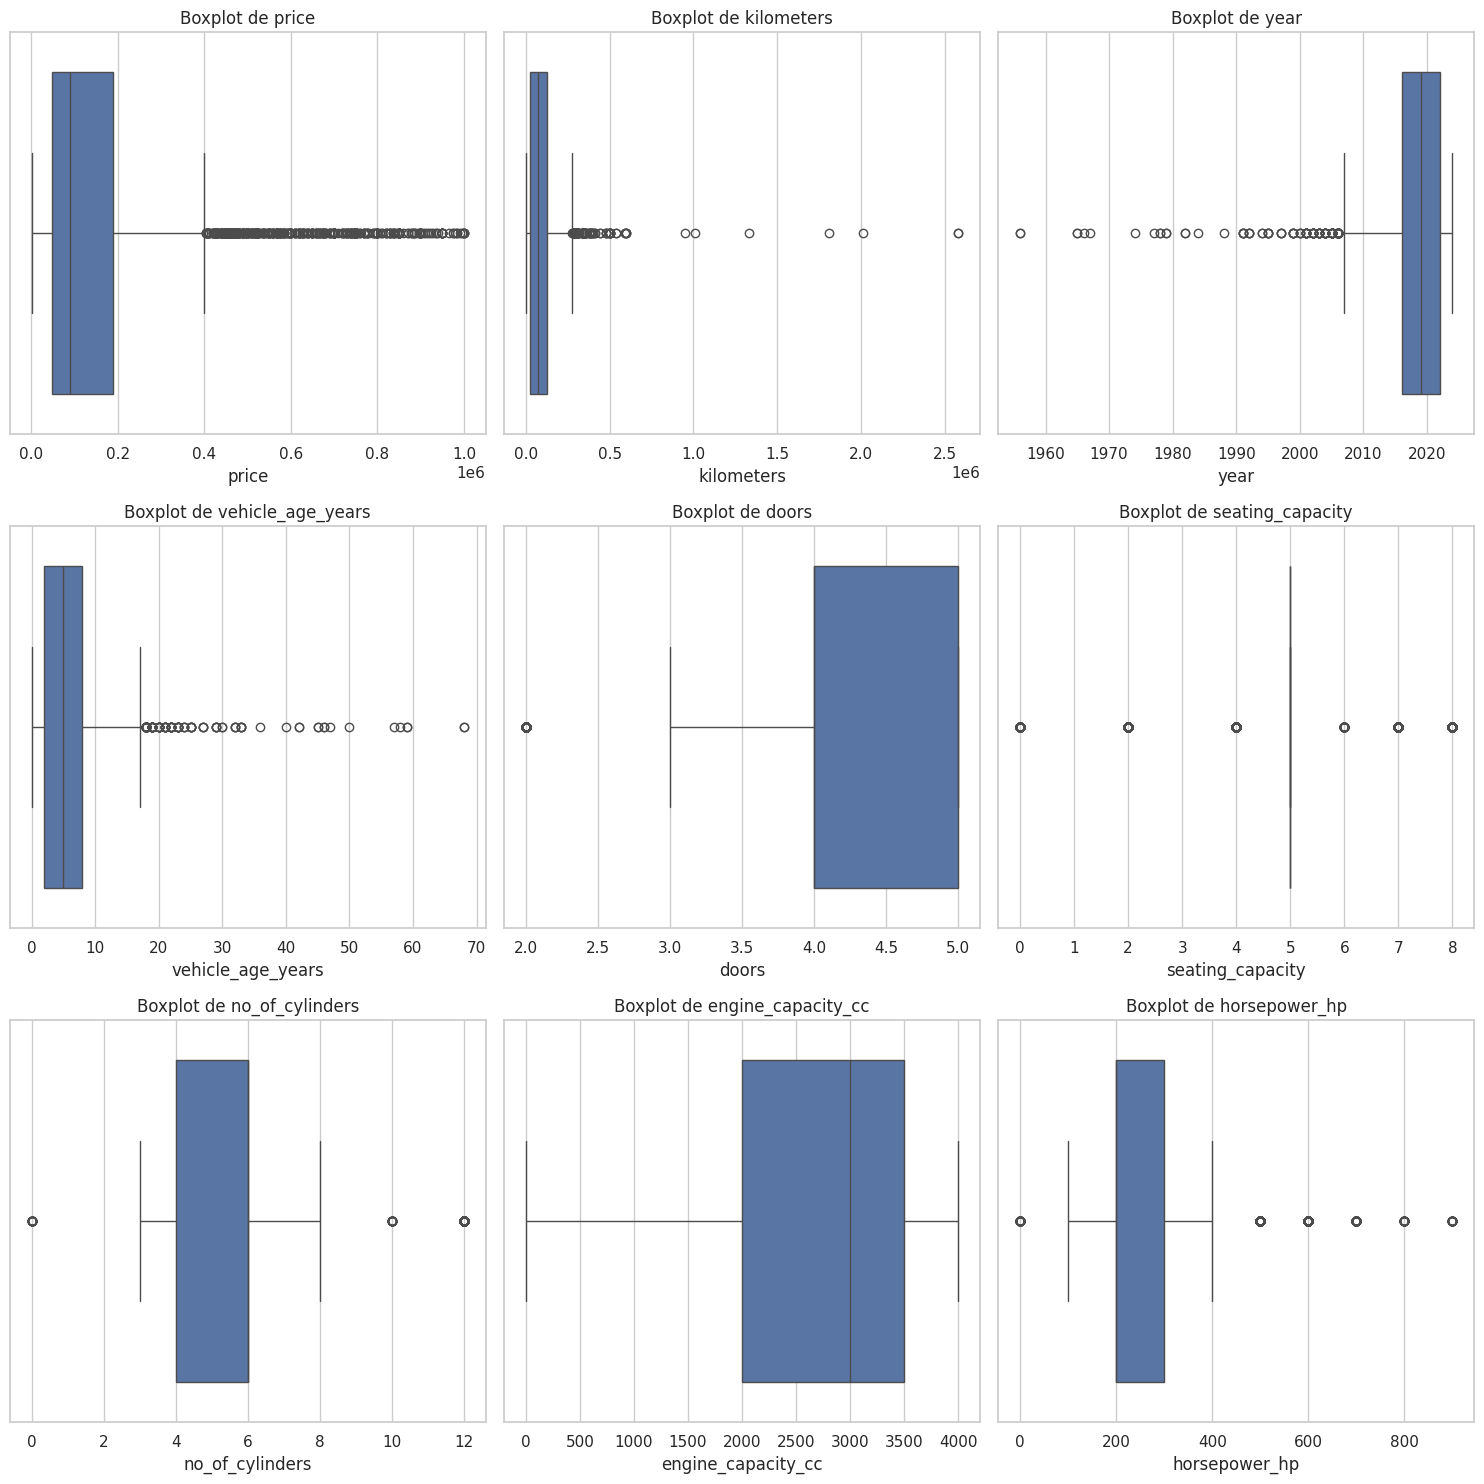

In [62]:
numeric_columns = data.select_dtypes(include=['int64', 'float64'])

# Calcular el número de filas y columnas para los subgráficos
num_vars = len(numeric_columns.columns)
num_rows = (num_vars // 3) + (1 if num_vars % 3 > 0 else 0)
num_cols = min(num_vars, 3)

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 5*num_rows))

# Generar y mostrar los diagramas de caja para cada variable numérica
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(x=data[col])
    plt.title("Boxplot de {}".format(col))
    plt.tight_layout()

plt.show()

**Transformaciones de Fechas/Nombres de variables/Valores**

# **EDA: Análisis Exploratorio de datos**

**Análisis univariado**

**Análisis bivariado**

**Análisis multivariado**

**Conclusiones del EDA**

# **Preprocesamiento de datos**

**Codificación de variables categóricas**

#**Feature Selection**

**Selección de variable objetivo y variables independientes**

# **Modelos**

**Librerias necesarias para implementar los modelos**

**División de datos en conjuntos de entrenamiento y prueba**

**Predicción con conjunto de prueba**

**Evaluación del rendimiento del modelo**

**Conclusión sobre el modelado y las metricas**

# **Conclusiones Finales**